## Overview
A common experimental design calls for some independent variable (or predictor variable) of interval or ratio scale to be systematically varied and the resulting dependent variable (or outcome variable) to be measured. An analysis is then performed to see if there is a correlation between the two variables. Sometimes a researcher may look for correlation between two variables without having a good idea of which is the predictor and which is the outcome. In situations such as these, a T-test can be performed on the Pearson's correlation coefficient for the relationship between the variables in the two samples to test the null hypothesis that there is no correlation between the two variables at the population level. 

After this notebook you will know:
* how to make scatter plots of data using python.
* how to fit scatter plots with lines of best fit.
* how to perform a T-test for &rho; (the population correlation coefficient) using r (the sample correlation coefficient). 

### About the Data
Name: cricketchirps.csv

Title: Cricket Chirps vs. Temperature

Source: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

Description:

X = chirps/sec for the striped ground cricket

Y = temperature in degrees Fahrenheit

The following cell will import the cricket chirps data into a pandas dataframe.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # some useful stuff
url = "https://raw.githubusercontent.com/prof-groff/evns462/master/data/cricketchirps.csv"
crickets = pd.read_csv(url)

In [16]:
print(crickets.shape)
crickets.head(5)

(15, 2)


,X chirps/sec,Y temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


### Temperature Versus Cricket Chirp Frequency

Can cricket chirp frequency predict temperature? Let's make a scatter plot and fit it with a line of best fit (linear regression) to explore the relationship between these two variables.

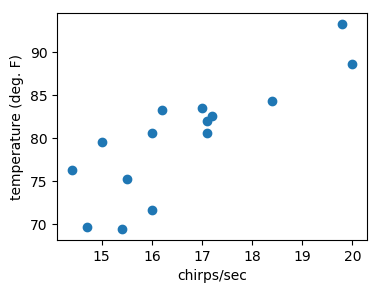

In [13]:
x = crickets['X chirps/sec']
y = crickets['Y temperature']
plt.figure(figsize=(4,3), dpi=100) # use commands like this to make figures bigger (size is in inches)
plt.scatter(x,y)
plt.xlabel('chirps/sec');
plt.ylabel('temperature (deg. F)')
plt.show()

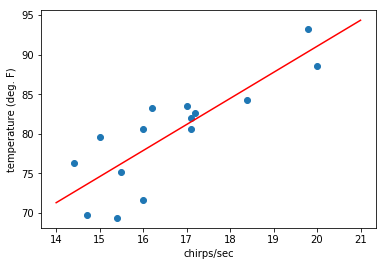

In [14]:
# import linear_model from scikit learn to do linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()

# fit the model
x = x.values.reshape(-1,1) # need to reshape so there is only one column ...
y = y.values.reshape(-1,1)
regr.fit(x,y) # ... because this function can't handle pandas data well.

# define limits for the line-of-best-fit
x_fit = np.array([14, 21]).reshape(-1,1)

plt.scatter(x,y)
plt.xlabel('chirps/sec');
plt.ylabel('temperature (deg. F)')
plt.plot(x_fit, regr.predict(x_fit),c='r') # you only need two points to make a line
plt.show()

In [15]:
# let's calculate the coefficent of determination, r^2
rsqr = regr.score(x,y)
print('r^2:', rsqr)
# the correlation coefficient is the squareroot of this
r = np.sqrt(rsqr)
print('r:', r)

r^2: 0.697465145017
r: 0.835143787031


### T-Test on Rho

* H<sub>0</sub>: &rho; = 0 at &alpha; = 0.05
* H<sub>A</sub>: &rho; not equal to 0. 

The test statistic for a t-test on rho is given by the following. 

t = (r sqrt(N-2))/sqrt(1 - r^2)

where

r is Pearson's correlation coefficient, N is the number of (x,y) pairs in the data sample, and there are N-2 degrees of freedom.

**What is the degrees of freedom and the t-critical value (two-tail) for the cricket data?**

df = N-2 = 15-2 = 13

t-critical = 2.16036866 

In [17]:
# now let's calculate the t-statistic based on r and N
N = len(x)
t = r*np.sqrt(N-2)/np.sqrt(1-r**2)
print('t =', t)

t = 5.47450960782


In [20]:
# There is a built in python function for doing a t-test on the population correlation coefficient rho.
r, pvalue = stats.pearsonr(x,y)
print('r =', r, 'p-value = ',pvalue)

r = [ 0.83514379] p-value =  [ 0.00010667]


### Intepreting the Result
Since the t-statistic is greater than t-critical we reject the null and accept the alternative hypothesis. There is a population level coorelation between cricket chirping frequency and temperature. 

There is a different test called ther Spearman R Test to look test for coorelations between rank-order (ordinal at best) data. The python function for this test is called stats.spearmanr() and it is used exactly like stats.pearsonr(). One can also calculate 95% confidence intervals on the population coorelation coefficent from the sample r using a procedure called the Fisher r-to-z transformation. 